In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [37]:
data = pd.read_csv('insurance.csv')

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [41]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [42]:
def bar_plot(column):
    plt.bar(data[column].value_counts().index, data[column].value_counts().values)
    plt.show()

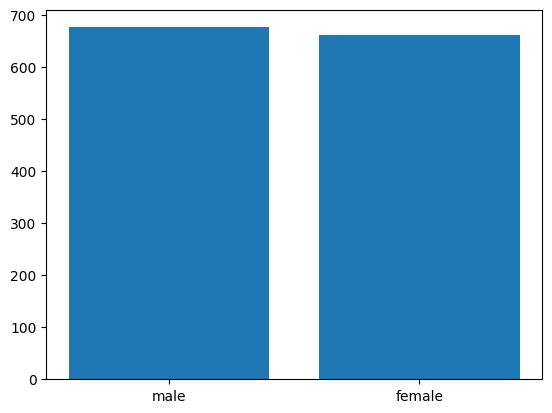

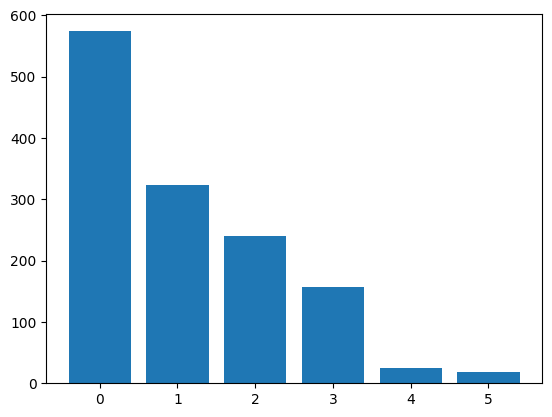

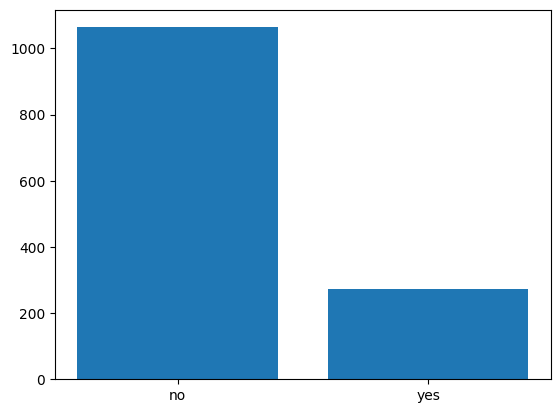

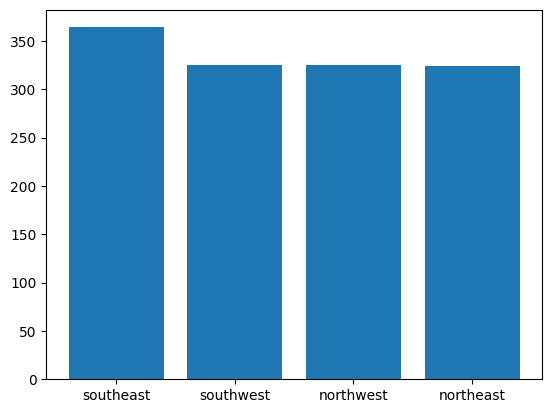

In [43]:
columns_to_plot = ['sex', 'children', 'smoker', 'region']
for column in columns_to_plot:
    bar_plot(column)

#разница в количестве женщин и мужчин минимальная. Этот показатель, скорее всего, не влияет на стоимость страховки пациента.
#большинство людей бездетные. Стоимость страховки может зависить от количества детей, охваченных медицинской страховкой. 
#не курящих заметно больше чем курильщиков. Скорее всего, стоимость страховки у курильщиков выше.
#распределение по регионам равномерное. Этот показатель, скорее всего, не влияет на стоимость страховки пациента.


In [44]:
sex_mapping = {"male": 0, "female": 1}
smoker_mapping = {"yes": 0, "no": 1}
region_mapping = {'southeast': 0, 'southwest': 1, 'northwest': 2, 'northeast': 3}

data['sex'] = data['sex'].replace(sex_mapping)
data['smoker'] = data['smoker'].replace(smoker_mapping)
data['region'] = data['region'].replace(region_mapping)

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520


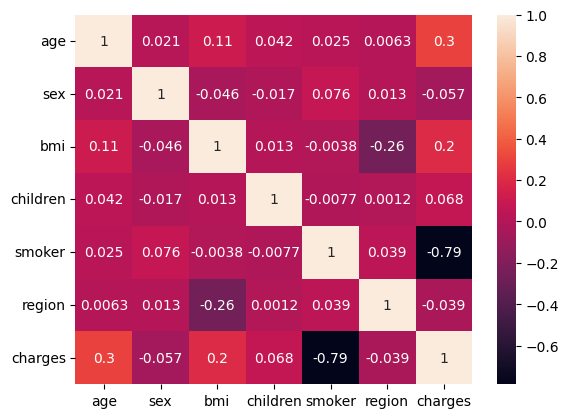

In [50]:
data_corr = data.corr()
sn.heatmap(data_corr, annot=True)
plt.show()
#тепловая карта показывает, что больше всего выделяется корреляция между стоимостью и курением(0.79).

In [51]:
X = data.drop('charges', axis=1).values
y = data['charges'].values

In [52]:
normalized_X = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))
normalized_y = (y - np.min(y)) / (np.max(y) - np.min(y))

In [53]:
lr = 0.3
epochs = 50000
w = np.zeros(normalized_X.shape[1])
b = 0

def MSE(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)
for i in range(epochs):
    y_pred = np.dot(normalized_X, w) + b
    loss = MSE(normalized_y, y_pred)
    der_w = (1 / normalized_X.shape[0]) * (2 * np.dot(normalized_X.T, (y_pred - normalized_y)))
    der_b = (1 / normalized_X.shape[0]) * (2 * np.sum(y_pred - normalized_y))
    w -= lr * der_w
    b -= lr * der_b
    if (i + 1) % 1000 == 0:
        print(f'Epoch [{i + 1}/{epochs}], Loss: {loss}')


Epoch [1000/50000], Loss: 0.009303383129113801
Epoch [2000/50000], Loss: 0.009303383129113685
Epoch [3000/50000], Loss: 0.009303383129113685
Epoch [4000/50000], Loss: 0.009303383129113685
Epoch [5000/50000], Loss: 0.009303383129113685
Epoch [6000/50000], Loss: 0.009303383129113685
Epoch [7000/50000], Loss: 0.009303383129113685
Epoch [8000/50000], Loss: 0.009303383129113685
Epoch [9000/50000], Loss: 0.009303383129113685
Epoch [10000/50000], Loss: 0.009303383129113685
Epoch [11000/50000], Loss: 0.009303383129113685
Epoch [12000/50000], Loss: 0.009303383129113685
Epoch [13000/50000], Loss: 0.009303383129113685
Epoch [14000/50000], Loss: 0.009303383129113685
Epoch [15000/50000], Loss: 0.009303383129113685
Epoch [16000/50000], Loss: 0.009303383129113685
Epoch [17000/50000], Loss: 0.009303383129113685
Epoch [18000/50000], Loss: 0.009303383129113685
Epoch [19000/50000], Loss: 0.009303383129113685
Epoch [20000/50000], Loss: 0.009303383129113685
Epoch [21000/50000], Loss: 0.009303383129113685
E

In [54]:
y_pred = np.dot(normalized_X, w) + b
predicted_expenses = y_pred * (np.max(y) - np.min(y)) + np.min(y)
print('Predicted expenses:', predicted_expenses)

Predicted expenses: [25496.99125189  3350.06214127  6601.3633646  ...  4057.15865376
  1433.10162318 37047.20944565]


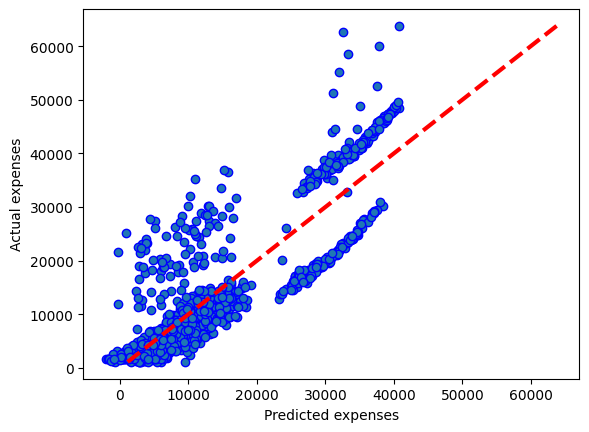

In [55]:
fig, ax = plt.subplots()
ax.scatter(predicted_expenses, y, edgecolors=(0, 0, 1))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=3)
ax.set_xlabel('Predicted expenses')
ax.set_ylabel('Actual expenses')
plt.show()